### IMDB 리뷰 data set
- 리뷰를 감상평에따라 긍정과 부정으로 분류한 data set.
- 자연어 처리(NLP) : 컴퓨터를 사용해 인간의 언어를 처리하는 분야.(ex> 음성인식, 기계번역, 감성분석.)
- 텍스트 데이터를 숫자데이터로 바꾸는 일반적인 방법은. 단어마다 고유한 정수를 부여하는 것이다.
- 일반적으로 영어문장은 소문자로 바꾸고 구둣점들을 삭제하고, 공백을 기준으로 분리한다.
- 분리된 단어 한개를 토큰이라고 한다. 1개의 토큰은 한개의 타임스템프에 해당한다.
- 정수중에 몇개는 특정한 용도로 예약되어있다.(ex> 0 : 패딩, 1 : 문장의시작, 2 : 어휘사전에 없는 토큰)


### IMDB data set 불러오기.
- tensorflow의 imdb 데이터는 이미 정수로 변환되어 있다.

In [1]:
# num_words=500 : 어휘사전에 500개의 단어만 들어가 있다. 사전에 없는 경우 모두 2로 표시한다.
from tensorflow.keras.datasets import imdb
(train_input, train_target), (test_input, test_target) = imdb.load_data(num_words=500)

<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
C:\Users\User\anaconda3\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\Users\User\anaconda3\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant t

In [2]:
print(train_input.shape, test_input.shape)

(25000,) (25000,)


In [3]:
#imdb 데이터는 numpy 1차원 배열로 되어있다.
#numpy배열은 정수나 실수외에도 파이썬 객체를 담을 수 있다.
print(len(train_input[0])) #첫번째 리뷰의 길이는 218개의 토큰으로 이루어져 있다.
print(len(train_input[1])) #두번째 리뷰의 길이는 189개의 토큰으로 이루어져 있다.

218
189


In [4]:
print(train_input[0])

[1, 14, 22, 16, 43, 2, 2, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 2, 112, 50, 2, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 2, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 2, 38, 76, 15, 13, 2, 4, 22, 17, 2, 17, 12, 16, 2, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 2, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 2, 36, 71, 43, 2, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]


In [5]:
#target값이 0(부정), 1(긍정)으로 나누어진다.
print(train_target[:20])

[1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1]


In [6]:
# train set, validation set 분류
from sklearn.model_selection import train_test_split
train_input, val_input, train_target, val_target = train_test_split(train_input, train_target, test_size=0.2, random_state=42)

In [7]:
#리뷰의 평균길이와, 최소길이, 최장길이를 확인하기 위해, 각 리뷰의 길이를 계산해 numpy 배열에 담는다. 
import numpy as np
lengths = np.array([len(x) for x in train_input])

In [8]:
print(np.mean(lengths), np.median(lengths)) #리뷰 길이의 평균과 중간값.

239.00925 178.0


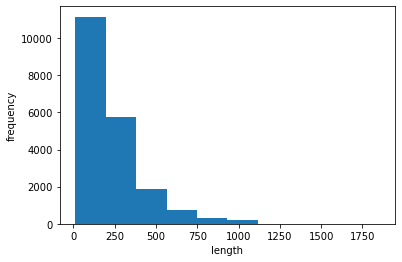

In [9]:
#위의 값을 보았을때 한쪽에 치우친 분포를 알 수 있다.
#히스토그램으로 그려보자.
import matplotlib.pyplot as plt
plt.hist(lengths)
plt.xlabel('length')
plt.ylabel('frequency')
plt.show()

In [10]:
#리뷰 data의 길이를 맞추기 위해 패딩이 필요하다.
#kearas의 sequence data의 길이를 맞추는 pad_sequences() 함수를 사용한다.
#train_input의 길이를 100으로 맞춰본다.
#maxlend에 원하는 길이를 지정하고 이보다 긴 경우는 잘라내고 짧은 경우는 0으로 패딩한다.
#pad_sequence 함수는 기본적으로 앞부분을 자른다. 왜냐하면 뒷부분의 정보가 더 유용하다고 기대하기 때문이다.
#뒷부분을 잘라내고 싶다면 truncating 매개변수의 기본값을 'pre'에서 'post'로 변경해주면 된다.
from tensorflow.keras.preprocessing.sequence import pad_sequences
train_seq = pad_sequences(train_input, maxlen=100)

In [11]:
#길이를 100으로 맞춘 2차원 배열이 되었다.
print(train_seq.shape)

(20000, 100)


In [12]:
#검증 set의 길이도 100으로 맞춰준다.
val_seq = pad_sequences(val_input, maxlen=100)

### 순환신경망 만들기.
- IMDB는 이진분류이므로 마지막 출력은 시그모이드 함수를 사용해야 한다.

In [13]:
#어휘사전을 처음에 500개의 단어를 저장해 주었다.
#그리고 한 리뷰에는 100개의 단어가 포함된다.
#따라서 단어 한개를 고유한 정수로 표현하기 위해서는 원핫인코딩이 필요하고, 한 단어당 500개의 배열이 필요하다.
#즉 토큰마다 500개의 숫자를 사용해 표현한다. 한개만 1이고 나머지는 0으로 만든다.
from tensorflow import keras
model = keras.Sequential()
model.add(keras.layers.SimpleRNN(8, input_shape=(100,500)))
model.add(keras.layers.Dense(1, activation = 'sigmoid'))

In [14]:
##하지만 keras는 원-핫 인코딩을 위한 유틸리티를 제공한다.(*따로 수동으로 만들어줄 필요가 없다.)
#keras.utils의 to_categorical()함수를 사용한다.
train_oh = keras.utils.to_categorical(train_seq)

In [15]:
print(train_oh.shape)

(20000, 100, 500)


In [16]:
#원핫 인코딩 된 모습.
print(train_oh[0][0][:])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

In [17]:
#검증데이터도 원핫이코딩 해주기.
val_oh = keras.utils.to_categorical(val_seq)

In [18]:
model.summary()
#SimpleRNN의 출력크기는 순환층의 뉴런개수와 동일한 8개의 출력을 확인할수 있음.

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 8)                 4072      
_________________________________________________________________
dense (Dense)                (None, 1)                 9         
Total params: 4,081
Trainable params: 4,081
Non-trainable params: 0
_________________________________________________________________


### 순환신경망 훈련하기.

In [36]:
#기본 RMSprop의 학습률 0.001을 사용하지 않기 위해 학습률을 변경한다. 0.0001
#epoch 횟수를 100으로 늘리고 배치크기는 64개로 설정한다.

rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer = rmsprop, loss='binary_crossentropy', metrics = ['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-simplernn-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                 restore_best_weights=True)

history = model.fit(train_oh, train_target, epochs=100, batch_size=64, validation_data = (val_oh, val_target),
                    callbacks = [checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 8s 22ms/step - loss: 0.7013 - accuracy: 0.5031 - val_loss: 0.6959 - val_accuracy: 0.5142
Epoch 2/100
313/313 [==============================] - 6s 19ms/step - loss: 0.6935 - accuracy: 0.5189 - val_loss: 0.6912 - val_accuracy: 0.5272
Epoch 3/100
313/313 [==============================] - 6s 20ms/step - loss: 0.6878 - accuracy: 0.5469 - val_loss: 0.6838 - val_accuracy: 0.5566
Epoch 4/100
313/313 [==============================] - 8s 24ms/step - loss: 0.6771 - accuracy: 0.5806 - val_loss: 0.6657 - val_accuracy: 0.6124
Epoch 5/100
313/313 [==============================] - 7s 22ms/step - loss: 0.6574 - accuracy: 0.6368 - val_loss: 0.6436 - val_accuracy: 0.6590
Epoch 6/100
313/313 [==============================] - 8s 24ms/step - loss: 0.6320 - accuracy: 0.6790 - val_loss: 0.6256 - val_accuracy: 0.6818
Epoch 7/100
313/313 [==============================] - 8s 24ms/step - loss: 0.6126 - accuracy: 0.7022 - val_loss: 0.6162 - val_accuracy:

### 평가된 loss를 그래프로 그리기.

In [19]:

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

NameError: name 'history' is not defined

In [20]:
#원핫인코딩으로 변환하면 단점이 입력데이터가 매우 커진다는 것이다.
print(train_seq.nbytes, train_oh.nbytes)

8000000 4000000000


### 단어임베딩(Word Embedding)을 사용하여 텍스트를 처리해주기.
- 순환신경망에서 텍스트 처리에 자주 사용
- 각 단어를 고정된 크기의 실수 벡터로 바꾸어 준다.
- Embedding 클래스를 사용한다.

In [21]:
#Embedding 클래스를 추가한 순환신경망.
#처음 500은 어휘 사전의 크기.
#두번째는 임베딩 벡터의 크기.(원핫 인코딩에서는 500이었음.)

model2 = keras.Sequential()
model2.add(keras.layers.Embedding(500, 16, input_length=100))
model2.add(keras.layers.SimpleRNN(8))
model2.add(keras.layers.Dense(1, activation = 'sigmoid'))

In [22]:
#(100,) 입력을 받아 (100,16)의 크기의 출력을 만든다.
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 16)           8000      
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 8)                 200       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 9         
Total params: 8,209
Trainable params: 8,209
Non-trainable params: 0
_________________________________________________________________


In [28]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model2.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-simplernn-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                 restore_best_weights=True)

history = model2.fit(train_seq, train_target, epochs=100, batch_size=64, validation_data = (val_seq, val_target),
                    callbacks = [checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 4s 9ms/step - loss: 0.6954 - accuracy: 0.5078 - val_loss: 0.6936 - val_accuracy: 0.5122
Epoch 2/100
313/313 [==============================] - 3s 8ms/step - loss: 0.6908 - accuracy: 0.5265 - val_loss: 0.6832 - val_accuracy: 0.5738
Epoch 3/100
313/313 [==============================] - 3s 8ms/step - loss: 0.6759 - accuracy: 0.6157 - val_loss: 0.6603 - val_accuracy: 0.6684
Epoch 4/100
313/313 [==============================] - 3s 9ms/step - loss: 0.6502 - accuracy: 0.6875 - val_loss: 0.6367 - val_accuracy: 0.7020
Epoch 5/100
313/313 [==============================] - 3s 9ms/step - loss: 0.6254 - accuracy: 0.7263 - val_loss: 0.6139 - val_accuracy: 0.7338
Epoch 6/100
313/313 [==============================] - 3s 10ms/step - loss: 0.6024 - accuracy: 0.7437 - val_loss: 0.5945 - val_accuracy: 0.7352
Epoch 7/100
313/313 [==============================] - 3s 10ms/step - loss: 0.5815 - accuracy: 0.7574 - val_loss: 0.5772 - val_accuracy: 0.74

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()